In [2]:
# Importation of necessary packages 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 

In [4]:
# Load the downloaded dataset from the csv file using pandas 
# copy the path for the csv file 
file_path = r"C:\Users\Awomodu David\Downloads\Creditcard_data\creditcard.csv"
data = pd.read_csv(file_path)

In [5]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
# This line prints the shape and description of the data 

print(data.shape)
print(data.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271

In [10]:
# This is to determien number of fraud cases in dataset 
fraud_case = data[data['Class']==1]
valid_transaction = data[data['Class']==0]
outlierFraction = len(fraud_case)/float(len(valid_transaction))
print(outlierFraction)
print('Fraud cases: {}'.format(len(data[data['Class']==1])))
print('Valid Transaction: {}'.format(len(data[data['Class']==0])))

0.0017304750013189597
Fraud cases: 492
Valid Transaction: 284315


In [11]:
# This is to print the detail amunt of the fraudlent transaction 
print("Amount details of the fraudulent trasaction")
fraud_case.Amount.describe()

Amount details of the fraudulent trasaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
# This line of code divide the X and Y from the dataset 
X = data.drop(['Class'], axis = 1)
Y = data['Class']
print(X.shape)
print(Y.shape)
# getting just teh value for the sake of processing 
# it is a numpy array with no colums 
x_data = X.values
y_data = Y.values 

(284807, 30)
(284807,)


In [14]:
# Using Sk learn to split data into training and testing sets 
from sklearn.model_selection import train_test_split 
# split the data into training and testing sets 
x_Train, x_Test, y_Train, y_Test = train_test_split(x_data, y_data, test_size = 0.2, random_state = 42)

In [15]:
# Building the Decision Tree Classifier (DTC)
from sklearn.tree import DecisionTreeClassifier
# Decision tree classifier
dtc = DecisionTreeClassifier()
dtc.fit(x_Train, y_Train)
# predictions 
y_pred = dtc.predict(x_Test)

In [23]:
# Evaluation of the DTC 
# printing everyscore of the DTC 
# scoring in anything 
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud_case) 
n_errors = (y_pred != y_Test).sum() 
print("The model used is Decision Tree Classifier") 
  
acc = accuracy_score(y_Test, y_pred) 
print("The accuracy is {}".format(acc)) 
  
prec = precision_score(y_Test, y_pred) 
print("The precision is {}".format(prec)) 
  
rec = recall_score(y_Test, y_pred) 
print("The recall is {}".format(rec)) 
  
f1 = f1_score(y_Test, y_pred) 
print("The F1-Score is {}".format(f1)) 
  
MCC = matthews_corrcoef(y_Test, y_pred) 
print("The Matthews correlation coefficient is {}".format(MCC)) 

The model used is Decision Tree Classifier
The accuracy is 0.9992275552122467
The precision is 0.7596153846153846
The recall is 0.8061224489795918
The F1-Score is 0.7821782178217821
The Matthews correlation coefficient is 0.7821379808026646


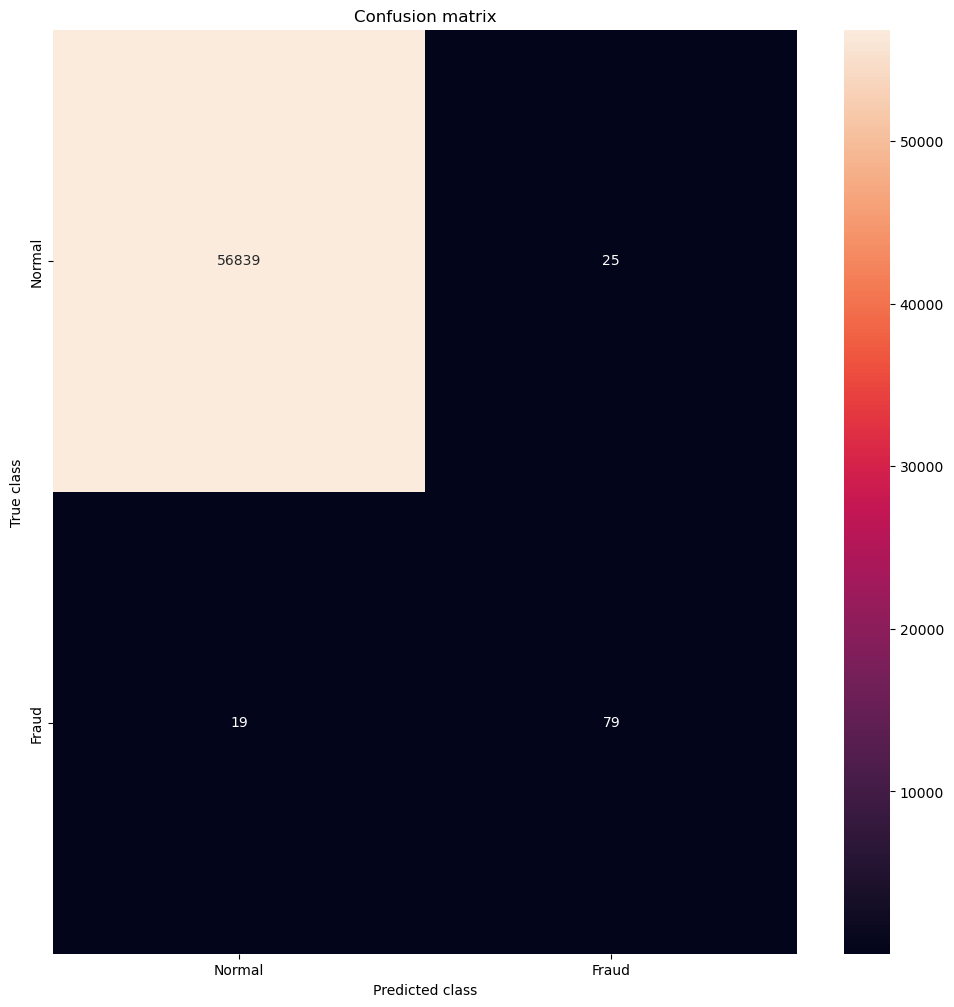

In [21]:
import seaborn as sns

# printing the confusion matrix 
LABELS = ['Normal', 'Fraud'] 
conf_matrix = confusion_matrix(y_Test, y_pred) 
plt.figure(figsize =(12, 12)) 
sns.heatmap(conf_matrix, xticklabels = LABELS,  
            yticklabels = LABELS, annot = True, fmt ="d"); 
plt.title("Confusion matrix") 
plt.ylabel('True class') 
plt.xlabel('Predicted class') 
plt.show() 